In [1]:
import pandas as pd
import numpy as np
import data_loader as dl 
import matplotlib
import seaborn

In [2]:
allScanNums = {}

In [3]:
def filter_data(df, cutoff, msfragger=False, prob_column='probability'):
    #drop decoy
    df = df[df["decoy"]==False]
    #sort by qvalue
    df = df.sort_values(prob_column)
    #drop duplicate scans
    df = df.drop_duplicates(subset=["scan"], keep="first") #keep highest coring
    #filter based on qvalue
    if msfragger == False:
        df = df[df[prob_column] <= cutoff]
    else:
        df = df[df[prob_column] >= 1-cutoff]
    return df


In [4]:
#pulling only scan numbers out
def newScanNum(row):
    return(int(row[35:40]))
    


In [5]:
meta = dl.clean_metamorph("2ng")
meta_df = filter_data(meta, .01)
meta_data = meta_df.filter((['scan', 'peptide']))
meta_data

,scan,peptide
0,38422,AEGSDVANAVLDGADCIMLSGETAK
1376,38502,VTIAQGGVLPNIQAVLLPK
1374,21218,KPTDGASSSNCVTDISHLVR
5873,32203,LVSSPCCIVTSTYGWTANMER
5876,15587,NM+15.995M+15.995AACDPR
...,...,...
17040,24809,SIDFPLTK
14587,40505,DPTAVIFGEDVAFGGVFR
14075,30563,EQQHVM+15.995EELFQSSFR
18845,13999,EGGGGKRK


In [6]:
msgf = dl.clean_msgfplus("2ng")
msgfplus_df = filter_data(msgf, .01, )
msgfplus_data = msgfplus_df.filter((['scan', 'peptide']))
msgfplus_data.head()
msgfplus_data

,scan,peptide
0,19653,NMGGPYGGGNYGPGGSGGSGGYGGR
6422,30100,EAAWAISNLTISGR
6423,28960,EEAWVIGSVVAR
6424,24500,DYLLCDYNR
6425,14802,EGETVEPYK
...,...,...
12126,12477,SETSGPQIK
12130,36687,KQNYMMNFSRQHGLRHFYNRR
28559,25034,FNTPQQPK
12132,13840,FNTPQQPK


In [7]:
msf = dl.clean_msfragger("2ng")
msf['scan'] = msf['scan'].apply(newScanNum) 
msfrag_df = filter_data(msf, .01, msfragger=True)

msfrag_data = msfrag_df.filter((['scan', 'peptide']))
msfrag_data


,scan,peptide
2641,17615,FIMESGAK
13173,40365,VFLENVIR
7305,25429,LVVLATPQVSDSMR
9596,29090,QVEDDIQQLLK
2946,18190,CLTQSGIAGGYK
...,...,...
6754,24567,DIISDTSGDFR
6755,24568,GPVEGYEENEEFLR
6756,24569,LVLLGESAVGK
6750,24561,THSDQFLVAFK


In [8]:
mq = dl.clean_maxquant("2ng")
maxq_df = filter_data(mq, .01)
maxq_data = maxq_df.filter((['scan', 'peptide']))
maxq_data


/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_peptide'] = df.apply(lambda row: format_oxidation(row, "Modified sequence", "(Oxidation (M))"), axis=1)
/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp_peptide"] = df["temp_peptide"].str[1:-1]
/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:169: SettingWithCopyWarning: 
A value is

,scan,peptide
33067,18289,PGNQNTQVTEAWNK
53134,40678,EILFSVDSSINQSIGGVILFHETLYQK
31499,16565,TNQELQEINR
37796,23490,VDATEESDLAQQYGVR
35548,21018,INEELESQYQQSMDSK
...,...,...
34912,20318,FGISSVPTK
47473,34134,DLEALMFDR
42420,28576,DIFDQLAK
30613,15590,VEEAFNCR


In [9]:
#datalist = dictionary part changing, word = which part getting change, 
#dataSet = which data set is getting added
def add(dataList, word, dataSet):
    temp_list = dataList[word]
    temp_list.append(dataSet)
    dataList[word] = temp_list

def scan_data(dataSet, dataNames, otherDatas):
    for index in dataSet:
        data_Dict = {}
        matches = {'same': [], 'different': [], 'missing':[]}
        scan_num = dataSet.scan[index]
        pep =  dataSet.peptide[index]

        for index in range(3):
            file = otherDatas[index]
            name = dataNames[index]
            temp = file[file.scan == scan_num]

            #check that df isn't empty
            if temp.empty == False: 
                if temp.iloc[0,2] == pep: #check if peps match
                    print("fnd pep: " + temp.iloc[0,2])
                    #print("found scan num: " + str(temp.iloc[0,0]))
                    add(matches, 'same', name)

                else:
                    #print("diff: ")
                    #print("fnd pep: " + temp.iloc[0,1])
                    add(matches, 'different', name)

            #when the scan number is empty
            else:
                add(matches, 'missing', name)
                #print(name + ' was empty')    
        data_Dict[scan_num] = matches
    return data_Dict

Temp_files = [maxq_data, msgfplus_data, msfrag_data]
dataNames = ['MaxQuant', 'MsgfPlus', 'Msfragger']
Meta_dict = scan_data(meta_data, dataNames, Temp_files)
len(Meta_dict)

In [10]:
#Running everything against MM
Meta_dict = {}
Temp_files = [maxq_data, msgfplus_data, msfrag_data]
dataNames = ['MaxQuant', 'MsgfPlus', 'Msfragger']

for index in meta_data.index:
    matches = {'same': [], 'different': [], 'missing':[]}
    scan_num = meta_data.scan[index]
    allScanNums[scan_num] = False
    pep = meta_data.peptide[index]
    #print("Scan Num: " + str(scan_num))
    #print("Peptide: " + str(pep))

    for index in range(3):
        file = Temp_files[index]
        name = dataNames[index]
        temp = file[file.scan == scan_num]
        
        #check that df isn't empty
        if temp.empty == False: 
            if temp.iloc[0,1] == pep: #check if peps match
                #print("fnd pep: " + temp.iloc[0,1])
                #print("found scan num: " + str(temp.iloc[0,0]))
                add(matches, 'same', name)
        
            else:
                #print("diff: ")
                #print("fnd pep: " + temp.iloc[0,1])
                add(matches, 'different', name)
                
        #when the scan number is empty
        else:
            add(matches, 'missing', name)
            #print(name + ' was empty')    
    
    Meta_dict[scan_num] = matches

In [11]:
len(Meta_dict)


13807

In [12]:
#Running everything against Msfragger
Msfrag_dict = {}
Temp_files = [maxq_data, msgfplus_data, meta_data]
dataNames = ['MaxQuant', 'MsgfPlus', 'MetaMorpheus']

for index in msfrag_data.index:
    matches = {'same': [], 'different': [], 'missing':[]}
    scan_num = msfrag_data.scan[index]
    pep = msfrag_data.peptide[index]
    allScanNums[scan_num] = False
    #print("Scan Num: " + str(scan_num))
    #print("Peptide: " + str(pep))
 
    for index in range(3):
        file = Temp_files[index]
        name = dataNames[index]
        temp = file[file.scan == scan_num]
        
        #check that df isn't empty
        if temp.empty == False: 
            if temp.iloc[0,1] == pep: #check if peps match
                #print("fnd pep: " + temp.iloc[0,1])
                #print("found scan num: " + str(temp.iloc[0,0]))
                add(matches, 'same', name)
        
            else:
                #print("diff: ")
                #print("fnd pep: " + temp.iloc[0,1])
                add(matches, 'different', name)
                
        #when the scan number is empty
        else:
            add(matches, 'missing', name)
            #print(name + ' was empty')    
    
    Msfrag_dict[scan_num] = matches

In [13]:
#print(Msfrag_dict)

In [14]:
Msfrag_dict

{17615: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 40365: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 25429: {'same': ['MaxQuant', 'MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': []},
 29090: {'same': ['MaxQuant', 'MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': []},
 18190: {'same': ['MaxQuant', 'MetaMorpheus'],
  'different': [],
  'missing': ['MsgfPlus']},
 29106: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 13577: {'same': ['MetaMorpheus'],
  'different': ['MsgfPlus'],
  'missing': ['MaxQuant']},
 17122: {'same': ['MaxQuant', 'MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': []},
 17538: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 14287: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 21372: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'differ

In [15]:
#Remove this later
d1 = pd.DataFrame(Msfrag_dict)
d1.to_excel("delete_Msf.xlsx")

In [16]:
#Running everything against MsgfPlus
MsgfPlus_dict = {}
Temp_files = [maxq_data,  msfrag_data, meta_data]
dataNames = ['MaxQuant', 'Msfragger', 'MetaMorpheus']


for index in msgfplus_data.index:
    matches = {'same': [], 'different': [], 'missing':[]}
    scan_num = msgfplus_data.scan[index]
    allScanNums[scan_num] = False
    pep = msgfplus_data.peptide[index]
    #print("Scan Num: " + str(scan_num))
    #print("Peptide: " + str(pep))

    for index in range(3):
        file = Temp_files[index]
        name = dataNames[index]
        temp = file[file.scan == scan_num]
        
        #check that df isn't empty
        if temp.empty == False: 
            if temp.iloc[0,1] == pep: #check if peps match
                #print("fnd pep: " + temp.iloc[0,1])
                #print("found scan num: " + str(temp.iloc[0,0]))
                add(matches, 'same', name)
        
            else:
                #print("diff: ")
                #print("fnd pep: " + temp.iloc[0,1])
                add(matches, 'different', name)
                
        #when the scan number is empty
        else:
            add(matches, 'missing', name)
            #print(name + ' was empty')    
    
    MsgfPlus_dict[scan_num] = matches

In [17]:
#print(MsgfPlus_dict)

In [18]:
#Running everything against MaxQuant
MaxQ_dict = {}
Temp_files = [meta_data, msgfplus_data, msfrag_data]
dataNames = ['MetaMorpheus', 'MsgfPlus', 'Msfragger']

for index in maxq_data.index:
    matches = {'same': [], 'different': [], 'missing':[]}
    scan_num = maxq_data.scan[index]
    allScanNums[scan_num] = False
    pep =  maxq_data.peptide[index]
    #print("Scan Num: " + str(scan_num))
    #print("Peptide: " + str(pep))

    for index in range(3):
        file = Temp_files[index]
        name = dataNames[index]
        temp = file[file.scan == scan_num]
        
        #check that df isn't empty
        if temp.empty == False: 
            if temp.iloc[0,1] == pep: #check if peps match
                #print("fnd pep: " + temp.iloc[0,1])
                #print("found scan num: " + str(temp.iloc[0,0]))
                add(matches, 'same', name)
        
            else:
                #print("diff: ")
                #print("fnd pep: " + temp.iloc[0,1])
                add(matches, 'different', name)
                
        #when the scan number is empty
        else:
            add(matches, 'missing', name)
            #print(name + ' was empty')    
    
    MaxQ_dict[scan_num] = matches

In [19]:
#Count how many scan numbers and peptides are unique to a specific tool
def countUniques(thisDict):
    totalCount = 0
    for scanKey in thisDict:
        scanValue = thisDict[scanKey]
        if len(scanValue['same']) == 0:
            totalCount +=1
    return totalCount
            

In [20]:
#Count how many scan numbers are unique to a specific tool
def countUniqueScans(thisDict):
    totalCount = 0
    for scanKey in thisDict:
        scanValue = thisDict[scanKey]
        if len(scanValue['missing']) == 3:
            totalCount +=1
    return totalCount
            

In [21]:
#get a list that gives scan numbers for same/different positions of dataSet in relation to another one 
#thisDict = dictionary that we are looking in, dictName = name of data dictionary came from, section = 'same'/'diff'
#dataSet = data we are looking for number of in the dictionary, newList = list to store scan numbers
def getCounts(thisDict, section, dataSet, newList):
    for scanKey in thisDict:
        scanValue = thisDict[scanKey]
        if dataSet in scanValue[section]:
            newList.add(scanKey)
    print('\t' + dataSet + " has " + str(len(newList)) + " scans that are " + section)
    return newList

In [22]:
#printing counts for MM
def printMeta():
    Msfrag_in_Meta = set()
    msfgp_in_Meta = set()
    MaxQ_in_Meta = set()
    print("MetaMorpheus: ")
    MaxQ_in_Meta = getCounts(Meta_dict,'same', 'MaxQuant', MaxQ_in_Meta)
    msfgp_in_Meta = getCounts(Meta_dict,'same', 'MsgfPlus', msfgp_in_Meta)
    Msfrag_in_Meta = getCounts(Meta_dict,'same', 'Msfragger', Msfrag_in_Meta)
    print('\t' + "There are " + str((countUniques(Meta_dict))) + " unique scans where nothing else matches")
    print('\t' + "There are " + str(len(MaxQ_in_Meta.intersection(msfgp_in_Meta, MaxQ_in_Meta))) + " values where all match")

In [23]:
#printing counts for MsFrag
def printMsFrag():
    Meta_in_MsFrag = set()
    msfgp_in_MsFrag = set()
    MaxQ_in_MsFrag = set()
    print("MsFragger: ")
    MaxQ_in_MsFrag = getCounts(Msfrag_dict,'same', 'MaxQuant', MaxQ_in_MsFrag)
    msfgp_in_MsFrag = getCounts(Msfrag_dict,'same', 'MsgfPlus', msfgp_in_MsFrag)
    Meta_in_MsFrag = getCounts(Msfrag_dict,'same', 'MetaMorpheus', Meta_in_MsFrag)
    print('\t' + "There are " + str((countUniques(Msfrag_dict))) + " unique scans where nothing else matches")
    print('\t' + "There are " + str(len(MaxQ_in_MsFrag.intersection(msfgp_in_MsFrag, Meta_in_MsFrag))) + " values where all match")

In [24]:
#printing counts for MsgfPlus
def printMsfgPlus():
    Msfrag_in_MsgfP = set()
    Meta_in_MsgfP = set()
    MaxQ_in_MsgfP = set()
    print("MsgfPlus: ")
    MaxQ_in_MsgfP = getCounts(MsgfPlus_dict,'same', 'MaxQuant', MaxQ_in_MsgfP)
    Meta_in_MsgfP = getCounts(MsgfPlus_dict,'same', 'MetaMorpheus', Meta_in_MsgfP)
    Msfrag_in_MsgfP = getCounts(MsgfPlus_dict,'same', 'Msfragger', Msfrag_in_MsgfP)
    print('\t' + "There are " + str((countUniques(MsgfPlus_dict))) + " unique scans where nothing else matches")
    print('\t' + "There are " + str(len(MaxQ_in_MsgfP.intersection(Meta_in_MsgfP, Msfrag_in_MsgfP))) + " values where all match")


In [25]:
#printing counts for MaxQuant
def printMaxQ():
    Msfrag_in_MaxQ = set()
    msfgp_in_MaxQ = set()
    Meta_in_MaxQ = set()
    print("MaxQuant: ")
    Meta_in_MaxQ = getCounts(MaxQ_dict,'same', 'MetaMorpheus', Meta_in_MaxQ)
    msfgp_in_MaxQ = getCounts(MaxQ_dict,'same', 'MsgfPlus', msfgp_in_MaxQ)
    Msfrag_in_MaxQ = getCounts(MaxQ_dict,'same', 'Msfragger', Msfrag_in_MaxQ)
    print('\t' + "There are " + str((countUniques(MaxQ_dict))) + " unique scans where nothing else matches")
    print('\t' + "There are " + str(len(Meta_in_MaxQ.intersection(msfgp_in_MaxQ, Msfrag_in_MaxQ))) + " values where all match")

In [26]:
#Print everything out
printMeta()
printMsFrag()
printMsfgPlus()
printMaxQ()


MetaMorpheus: 
	MaxQuant has 7858 scans that are same
	MsgfPlus has 10499 scans that are same
	Msfragger has 10063 scans that are same
	There are 2795 unique scans where nothing else matches
	There are 7645 values where all match
MsFragger: 
	MaxQuant has 7989 scans that are same
	MsgfPlus has 10592 scans that are same
	MetaMorpheus has 10063 scans that are same
	There are 670 unique scans where nothing else matches
	There are 7406 values where all match
MsgfPlus: 
	MaxQuant has 8128 scans that are same
	MetaMorpheus has 10499 scans that are same
	Msfragger has 10592 scans that are same
	There are 750 unique scans where nothing else matches
	There are 7406 values where all match
MaxQuant: 
	MetaMorpheus has 7858 scans that are same
	MsgfPlus has 8128 scans that are same
	Msfragger has 7989 scans that are same
	There are 358 unique scans where nothing else matches
	There are 7406 values where all match


In [27]:
len(allScanNums)

15428

In [28]:
#The first functions check if something matches scan and peptide.
#Second function just checks for matching scan numbers
#Mainly only checking in MM because if three of them match, then they all will match in each others dataSets

In [29]:
def checkAll(num):
    if num in Meta_dict: 
        if len(Meta_dict[num]['same']) == 3:
            return True

def checkAll_scans(num):
    if num in Meta_dict: 
        if len(Meta_dict[num]['missing']) == 0:
            return True

In [30]:
#all except for MSGF
def checkMSGF(num):
    if num in Meta_dict:
        if 'Msfragger' in Meta_dict[num]['same'] and 'MaxQuant' in Meta_dict[num]['same'] and 'MsgfPlus' not in Meta_dict[num]['same']:
             return True
            
def checkMSGF_scans(num):
    if num in Meta_dict:
        if 'Msfragger' not in Meta_dict[num]['missing'] and 'MaxQuant' not in Meta_dict[num]['missing'] and 'MsgfPlus' in Meta_dict[num]['missing']:
             return True

In [31]:
def checkMQ(num):
    if num in Meta_dict:
        if 'Msfragger' in Meta_dict[num]['same'] and 'MsgfPlus' in Meta_dict[num]['same'] and 'MaxQuant' not in Meta_dict[num]['same']:
             return True
            
def checkMQ_scans(num):
    if num in Meta_dict:
        if 'Msfragger' not in Meta_dict[num]['missing'] and 'MsgfPlus' not in Meta_dict[num]['missing'] and 'MaxQuant' in Meta_dict[num]['missing']:
             return True
            

In [32]:
def checkMSF(num):
    if num in Meta_dict:
        if 'MaxQuant' in Meta_dict[num]['same'] and 'MsgfPlus' in Meta_dict[num]['same'] and 'Msfragger' not in Meta_dict[num]['same']:
             return True
            
def checkMSF_scans(num):
    if num in Meta_dict:
        if 'MaxQuant' not in Meta_dict[num]['missing'] and 'MsgfPlus' in Meta_dict[num]['missing'] and 'Msfragger' in Meta_dict[num]['missing']:
             return True

In [52]:
def checkMM(num):
    if num in MsgfPlus_dict:
        if 'MaxQuant' in MsgfPlus_dict[num]['same'] and 'Msfragger' in MsgfPlus_dict[num]['same'] and 'MetaMorpheus' not in MsgfPlus_dict[num]['same']:
             return True

def checkMM_scans(num):
    if num in MsgfPlus_dict:
        if 'MaxQuant' not in MsgfPlus_dict[num]['missing'] and 'Msfragger' in MsgfPlus_dict[num]['missing'] and 'MetaMorpheus' in MsgfPlus_dict[num]['missing']:
             return True            

In [34]:
 #Meta_dict, Msfrag_dict, MaxQ_dict, MsgfPlus_dict
#dataNames = ['MaxQuant', 'Msfragger', 'MetaMorpheus', 'MsgfPlus', ]

In [53]:
#Checking how many match on scan number and peptide
allSame = []
noMSG = []
noMsF = []
noMM = []
noMQ = []

for num in allScanNums:
    if checkAll(num) == True:
        allSame.append(num)
    elif checkMSGF(num) == True:
        noMSG.append(num)
    elif checkMQ(num) == True:
        noMQ.append(num)
    elif checkMSF(num) == True:
        noMsF.append(num)
    elif checkMM(num) == True:
        noMM.append(num)
        
print('allSame: ' + str(len(allSame)))
print('noMSG: ' + str(len(noMSG)))
print('noMsF: ' + str(len(noMsF)))
print('noMM: ' + str(len(noMM)))
print('noMQ: ' + str(len(noMQ)))        

allSame: 7406
noMSG: 103
noMsF: 239
noMM: 405
noMQ: 2254


In [36]:
#Checking how many match on scan number only 
sameScan = []
noMSG_scan = []
noMsF_scan = []
noMM_scan = []
noMQ_scan = []

for num in allScanNums:
    if checkAll_scans(num) == True:
        sameScan.append(num)
    elif checkMSGF_scans(num) == True:
        noMSG_scan.append(num)
    elif checkMQ_scans(num) == True:
        noMQ_scan.append(num)
    elif checkMSF_scans(num) == True:
        noMsF_scan.append(num)
    elif 
        
print('sameScan: ' + str(len(sameScan)))
print('noMSG_scan: ' + str(len(noMSG_scan)))
print('noMsF_scan: ' + str(len(noMsF_scan)))
print('noMM_scan: ' + str(len(noMM_scan)))
print('noMQ_scan: ' + str(len(noMQ_scan))) 

sameScan: 7880
noMSG_scan: 115
noMsF_scan: 139
noMM_scan: 0
noMQ_scan: 2547


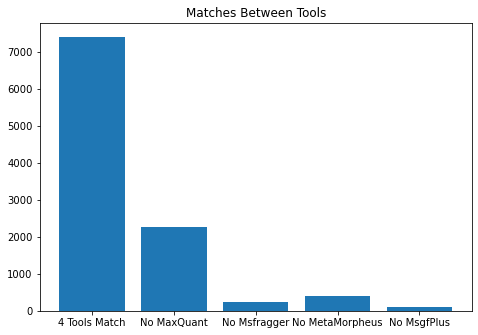

In [54]:
#with scan number and peptide matching
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tools = ['4 Tools Match','No MaxQuant', 'No Msfragger', 'No MetaMorpheus', 'No MsgfPlus']
ranges = [len(allSame), len(noMQ), len(noMsF), len(noMM), len(noMSG)]
ax.bar(tools, ranges)
plt.title("Matches Between Tools")
plt.show()


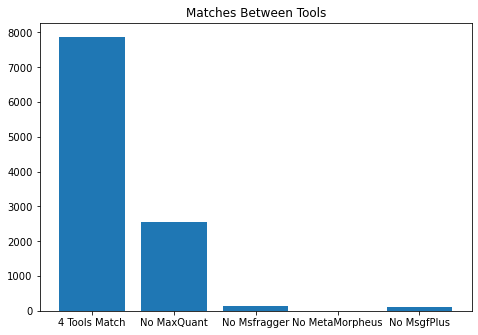

In [38]:
#with matching scan number only
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tools = ['4 Tools Match','No MaxQuant', 'No Msfragger', 'No MetaMorpheus', 'No MsgfPlus']
ranges = [len(sameScan), len(noMQ_scan), len(noMsF_scan), len(noMM_scan), len(noMSG_scan)]
ax.bar(tools, ranges)
plt.title("Matches Between Tools")
plt.show()

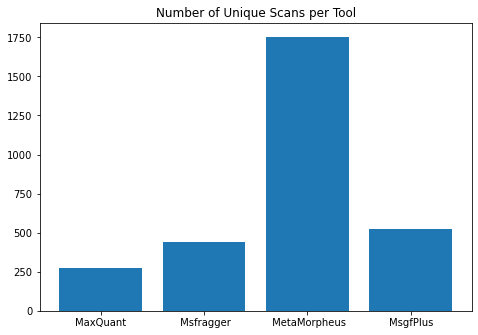

In [39]:
#Number of unique scans per tool (not including matching peptides)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tools = ['MaxQuant', ' Msfragger', ' MetaMorpheus', 'MsgfPlus']
Unique_Scans = [ countUniqueScans(MaxQ_dict), countUniqueScans(Msfrag_dict), countUniqueScans(Meta_dict), countUniqueScans(MsgfPlus_dict)]
ax.bar(tools, Unique_Scans)
plt.title("Number of Unique Scans per Tool")
plt.show()

In [40]:
##For each scan that's missing in only one tool, we need to graph all of the p values

In [50]:
#For scan numbers that did not match, checking the unfiltered set to see if they exist and collecting their pvalues. 
def find_pvals(list_without, dataSet, name, finalDF):
    for num in list_without:
        tempFrame = dataSet[dataSet.scan == num]
        tempFrame['dataset'] = name
        if tempFrame.empty != True:
            finalDF = pd.concat([tempFrame, finalDF], ignore_index = True)
    return finalDF

In [42]:
Pval_df = pd.DataFrame()

Pval_df = find_pvals(noMsF, msf, 'msf', Pval_df)
print(len(Pval_df))

Pval_df = find_pvals(noMSG, msgf, 'msgf', Pval_df)
print(len(Pval_df))

Pval_df = find_pvals(noMQ, mq, 'mq', Pval_df)
print(len(Pval_df))

<ipython-input-41-df9cc260dc73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempFrame['dataset'] = name


163
283
2537


In [45]:
PvalScans_df = pd.DataFrame()

PvalScans_df = find_pvals(noMsF_scan, msf, 'msf', PvalScans_df)
print(len(PvalScans_df))

PvalScans_df = find_pvals(noMSG_scan, msgf, 'msgf', PvalScans_df)
print(len(PvalScans_df))

PvalScans_df = find_pvals(noMQ_scan, mq, 'mq', PvalScans_df)
print(len(PvalScans_df))

PvalScans_df = find_pvals(noMM_scan, meta, 'MM', PvalScans_df)
print(len(PvalScans_df))


<ipython-input-41-df9cc260dc73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempFrame['dataset'] = name


29
150
2697
2697


In [47]:
PvalScans_df = PvalScans_df[PvalScans_df.probability <= 1]

In [48]:
print(len(PvalScans_df))

2442


In [ ]:
# For matching scans and peptides
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="dataset", y="probability", data=Pval_df, showfliers = False)
ax = sns.swarmplot(x="dataset", y="probability", data=Pval_df, color=".25")

plt.show()

In [ ]:
#For matching scans only
#Cut this at 1. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="dataset", y="probability", data=PvalScans_df, showfliers = False)
ax = sns.swarmplot(x="dataset", y="probability", data=PvalScans_df, color=".25")

plt.show()

In [ ]:
PvalScans_df = pd.DataFrame()

PvalScans_df = find_pvals(noMsF_scan, msf, 'msf', PvalScans_df)
print(len(PvalScans_df))

In [ ]:
#For matching scans only
#Cut this at 1. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="dataset", y="probability", data=PvalScans_df, showfliers = False)
ax = sns.swarmplot(x="dataset", y="probability", data=PvalScans_df, color=".25")

plt.show()